In [124]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px

In [125]:
data_dir = 'data/Amazon_Total_Qualifications.txt'
data = pd.read_table(data_dir, sep = '\t')
JobDict = {
    'DS': 'data-science',
    'RS': 'research-science',
    'ML': 'machine-learning-science',
    'BI': 'business-intelligence',
    'SDE': 'software-development'
}
selected_job = 'BI'

In [126]:
def plot_wordcloud(data, selected_job):
    selected_data = data.loc[data.Category == JobDict[selected_job]].reset_index(drop=True)
    selected_data["All_Qualifications"] = selected_data.Basic_Qualifications + selected_data.Preferred_Qualifications
    selected_qualifications= ''.join(selected_data.All_Qualifications)
    my_stopwords = {'and', 'experience', 'e', 'g', 'in', 'a', 'years', 'of', 'with', 'ability', 'to',
                    'such', 'as', 'working', 'the', 'related', 'field' ,'or', 'work', 'for', 'using',
                    'etc', 'other', 'At', 'least', 'similar', 'equivalent', 's', 'on', 'M' ,'one', 'degree',
                    'knowledge', 'building', 'strong', 'skill', 'skills', 'relevant', 'advanced', 'R',
                    'demonstrated', 'tools', 'proficiency', 'environment', 'technical', 'engineering'}
    
    wc = WordCloud(background_color='white', min_font_size = 8, prefer_horizontal = 1, stopwords = my_stopwords)
    wc.generate(selected_qualifications)
    frequencies = wc.process_text(selected_qualifications)
    return wc.to_image(), frequencies

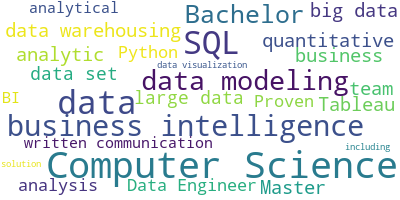

In [127]:
image, frequencies = plot_wordcloud(data, selected_job)
image

In [128]:
freq_table = pd.DataFrame(frequencies.items(), columns=['Skill', 'Frequency'])
freq_table = freq_table.sort_values(by='Frequency', ascending=False).reset_index(drop=True)[:20][::-1]
freq_table

,Skill,Frequency
19,analysis,63
18,Proven,65
17,Data Engineer,66
16,Python,67
15,data set,71
14,large data,72
13,Tableau,80
12,Master,84
11,business,86
10,team,88


In [129]:
fig = px.bar(freq_table, x='Frequency', y='Skill', title='Top 20 Skills for ' + JobDict[selected_job])
fig.update_layout(yaxis= dict(dtick = 1))
fig